## Web Scraping
Importamos los datos de los estados con mayor PBI per capita de los Estados Unidos

In [58]:
# Importamos las librerias
from bs4 import BeautifulSoup as bs
import pandas as pd
import requests as rq
import matplotlib.pyplot as plt

In [59]:
url_one = 'https://es.wikipedia.org/wiki/Anexo:Estados_de_los_Estados_Unidos_por_PIB'
page_one = rq.get(url_one).text

In [60]:
# Parseamos el html utilizando BeautifulSoup
soup_one = bs(page_one, 'html.parser')
table_one = soup_one.find('table')

In [61]:
# Creamos un DataFrame vacio
df_pbi_per_capita = pd.DataFrame(columns=['estados', 'PBI (millones de $)', 'PBI nacional (% del total)', 'poblacion (millones)', 'PBI per capita ($)', 'ranking nacional'])

In [62]:
# Obtenemos las filas de la tabla
for row in table_one.find_all('tr')[1:]:
    cols = row.find_all('td')
    cols = [col.text.strip() for col in cols]

    if len(cols) >= 5:
        estados = cols[0]
        pbi_millones = cols[1]
        porcentaje_pbi = cols[2]
        poblacion = cols[3]
        pbi_per_capita = cols[4]
        ranking = cols[5]

        row_data = {'estados': estados, 'PBI (millones de $)': pbi_millones, 'PBI nacional (% del total)': porcentaje_pbi,
                    'poblacion (millones)': poblacion, 'PBI per capita ($)': pbi_per_capita, 'ranking nacional': ranking}
        df_pbi_per_capita = pd.concat([df_pbi_per_capita, pd.DataFrame([row_data])])

In [63]:
df_pbi_per_capita['ranking nacional'] = pd.to_numeric(df_pbi_per_capita['ranking nacional'], errors='coerce')

# Ordenamos el DataFrame por la columna "ranking nacional" en orden ascendente
df_pbi_per_capita = df_pbi_per_capita.sort_values(by='ranking nacional', ascending=True)
df_pbi_per_capita

,estados,PBI (millones de $),PBI nacional (% del total),poblacion (millones),PBI per capita ($),ranking nacional
0,Distrito de Columbia,104.700,0.72,0.6,174.500,1.0
0,Delaware,62.700,0.43,0.9,69.667,2.0
0,Alaska,45.600,0.31,0.7,65.143,3.0
0,Connecticut,233.400,1.61,3.6,64.833,4.0
0,Wyoming,38.200,0.26,0.6,63.667,5.0
0,Massachusetts,377.700,2.60,6.5,58.108,6.0
0,Nueva York,1.156.500,7.68,19.4,57.423,7.0
0,Nueva Jersey,497.000,3.42,8.8,56.477,8.0
0,Virginia,427.700,2.95,8.0,53.463,9.0
0,California,1.936.400,13.34,37.3,51.914,12.0


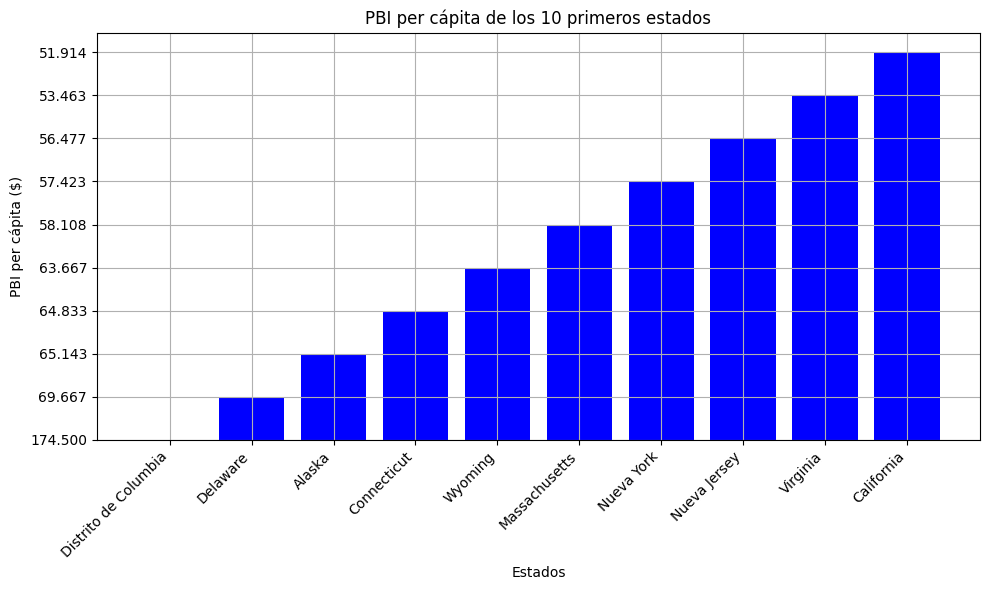

In [64]:
# Tomamos los primeros 10 estados
df_top_10 = df_pbi_per_capita.head(10)

# Graficamos el PBI per cápita vs. Ranking Nacional para los primeros 10 estados
plt.figure(figsize=(10, 6))
plt.bar(df_top_10['estados'], df_top_10['PBI per capita ($)'], color='b')
plt.title('PBI per cápita de los 10 primeros estados')
plt.xlabel('Estados')
plt.ylabel('PBI per cápita ($)')
plt.xticks(rotation=45, ha="right")
plt.grid(True)
plt.tight_layout()
plt.show()